# PGA Tour 2006
This is some data on people that played on the PGA tour in 2006. I figured it would be interesting to look at how different Tiger woods is from the field.

In [36]:
from datetime import datetime
from matplotlib import patches as mpatches
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [37]:
df = pd.read_excel('pgatour2006.xlsx')
df.head()

,Name,TigerWoods,PrizeMoney,AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound
0,Aaron Baddeley,0,60661,288.3,60.73,58.26,1.745,31.36,54.80,59.37,19.30,27.96
1,Adam Scott,0,262045,301.1,62.00,69.12,1.767,30.39,53.61,57.94,19.35,29.28
2,Alex Aragon,0,3635,302.6,51.12,59.11,1.787,29.89,37.93,50.78,16.80,29.20
3,Alex Cejka,0,17516,288.8,66.40,67.70,1.777,29.33,45.13,54.82,17.05,29.46
4,Arjun Atwal,0,16683,287.7,63.24,64.04,1.761,29.32,52.44,57.07,18.21,28.93


In [38]:
df.columns = [x.strip() for x in df.columns] # there are some trailing spaces in some of the column names
df.describe()

,TigerWoods,PrizeMoney,AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.005102,50891.168367,289.498469,63.380102,65.186071,1.779852,28.982296,48.971735,57.494439,19.598112,29.201071
std,0.071429,63902.953418,8.730509,5.413023,2.722364,0.024728,2.206556,5.828313,3.162257,2.806113,0.441702
min,0.000000,2240.000000,265.900000,49.750000,56.870000,1.712000,23.170000,33.910000,49.020000,12.290000,27.960000
25%,0.000000,17368.750000,283.550000,59.757500,63.522500,1.763000,27.507500,45.130000,55.260000,17.557500,28.910000
50%,0.000000,36644.500000,288.250000,63.240000,65.355000,1.778000,29.010000,48.655000,57.650000,19.620000,29.190000
75%,0.000000,57915.250000,295.525000,66.965000,66.770000,1.796250,30.552500,52.870000,59.457500,21.310000,29.477500
max,1.000000,662771.000000,319.600000,78.430000,74.150000,1.851000,35.660000,63.640000,66.450000,25.930000,30.190000


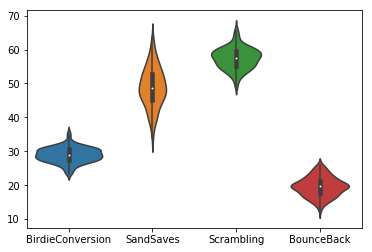

In [85]:
sns.violinplot(data=df.iloc[:,7:-1]) # only the variables that are on a similar scale

## A first glance

In [4]:
df.groupby('TigerWoods').mean() # comparing Tiger Woods to the mean performance that year

,PrizeMoney,AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound
TigerWoods,,,,,,,,,,
0,47753.323077,289.411795,63.393795,65.140103,1.779974,28.950103,48.939949,57.467179,19.57159,29.200154
1,662771.000000,306.400000,60.710000,74.150000,1.756000,35.260000,55.170000,62.810000,24.77000,29.380000


Some scatter plots should help us to see the relationship between the different measured values and prize money. I know that Tiger Woods is going to be a huge outlier already so I will point him out.

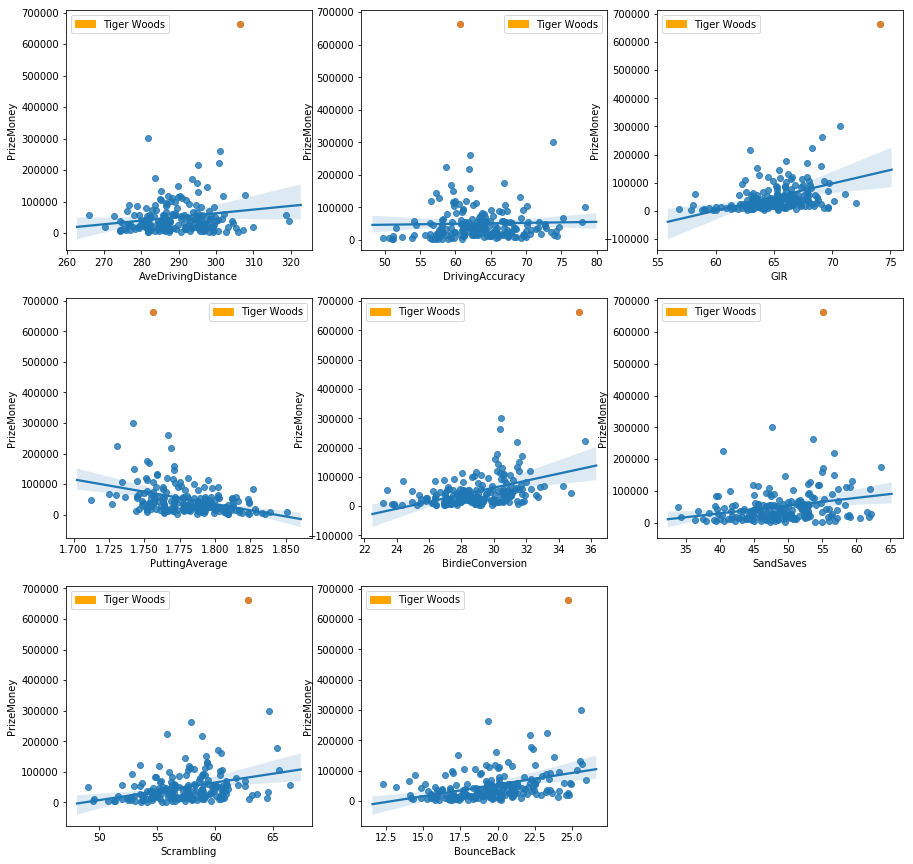

In [5]:
def grid_regplot(df, columns, y, nrow=3, ncol=3, fig_size=15):
    """Makes a grid of regplots with seaborn"""
    fig = plt.figure()
    fig.set_figheight(fig_size)
    fig.set_figwidth(fig_size)
    patch = mpatches.Patch(color='orange', label='Tiger Woods')
    for i, col in enumerate(columns):
        plt.subplot(nrow, ncol, i + 1)
        sns.regplot(df[col], y)
        sns.regplot(df.loc[df['TigerWoods'] == 1,col],
                    y[df['TigerWoods'] == 1],
                    fit_reg=False)
        plt.legend(handles=[patch])
grid_regplot(df, df.columns[3:-1], df['PrizeMoney'])

It doesn't appear that this tells us as much as it could in its current state. If we do a log transform of the prize money column it might help us get a better idea of the relationships.

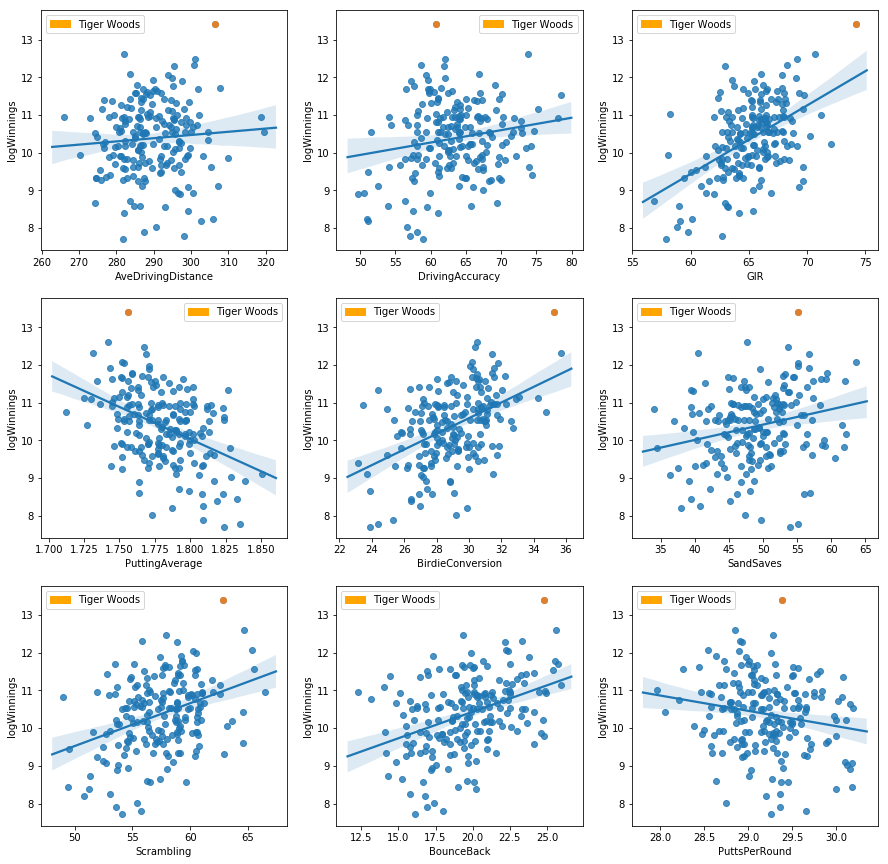

In [6]:
df['logWinnings'] = np.log(df['PrizeMoney'])
grid_regplot(df, df.columns[3:-1], df['logWinnings'])

## Outliers
Tiger Woods may not be the only player to significantly outperform the average PGA tour player. We can look at the distribution of prize winnings for the year to see who outperformed their peers.

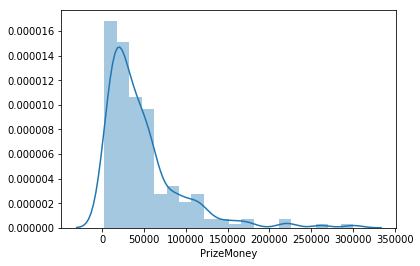

In [7]:
sns.distplot(df['PrizeMoney'][df['TigerWoods'] != 1], bins=20)

It looks like the people that really outperformed the pack earned over $200000 in prize money. Let's look at what makes them different from the rest.

In [8]:
df['TopEarners'] = df['PrizeMoney'] >= 200000
df.groupby('TopEarners').mean()

,TigerWoods,PrizeMoney,AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound,logWinnings
TopEarners,,,,,,,,,,,,
False,0.0,43494.884817,289.30,63.379267,65.085183,1.780555,28.88644,48.926649,57.428115,19.507906,29.204503,10.319367
True,0.2,333429.200000,297.08,63.412000,69.040000,1.753000,32.64400,50.694000,60.028000,23.044000,29.070000,12.620892


Well, it looks like the average for these players is better than the field in every category. So the secret to winning lots of money is simply doing everything better than everyone else.  
## Distance vs. Accuracy
Another things that may be important is the relationship between driving distance and accuracy. You obviously want to get as far as you can but if you never hit the fairway then squeezing out an extra few yards may not be worth it.

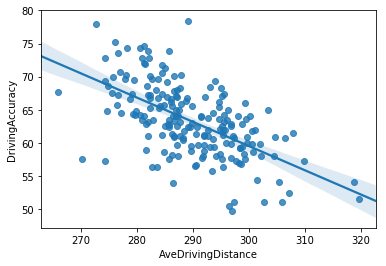

In [9]:
sns.regplot(df['AveDrivingDistance'], df['DrivingAccuracy'])

The tradeoff between these two might be important so we can make a ratio to see what the best combination is.

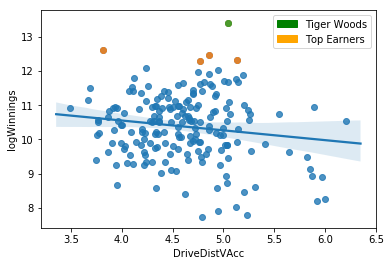

In [10]:
df['DriveDistVAcc'] = df['AveDrivingDistance']/ df['DrivingAccuracy'] 
sns.regplot(df['DriveDistVAcc'], df['logWinnings'])
sns.regplot(df['DriveDistVAcc'][df['TopEarners']], df['logWinnings'][df['TopEarners']], fit_reg=False)
sns.regplot(df['DriveDistVAcc'][df['TigerWoods'] == 1], df['logWinnings'][df['TigerWoods'] == 1],
            fit_reg=False)
patch1 = mpatches.Patch(color='green', label='Tiger Woods')
patch2 = mpatches.Patch(color='orange', label='Top Earners')
plt.legend(handles=[patch1, patch2])

It seems that you should value accuracy over distance when it comes to your drives.